Classification vanilla

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import PIL
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_moons, make_circles, make_classification, make_blobs
import sklearn

from tqdm import tqdm

from sklearn.neural_network._base import log_loss as log_loss_sk

In [ ]:
def init(n0, n1,n2):
   W1 = np.random.randn(n1,n0)
   b1 = np.random.randn(n1,1)
   W2 = np.random.randn(n2,n1)
   b2 = np.random.randn(n2,1)

   params = {
       'W1': W1,
       'b1': b1,
       'W2': W2,
       'b2': b2
   }
   return params

In [ ]:
def fowardProp(X,params):

  W1 = params['W1']
  W2 = params['W2']
  b1 = params['b1']
  b2 = params['b2']

  Z1 = W1.dot(X) + b1
  A1 = 1 / (1 + np.exp(-Z1))

  Z2 = W2.dot(A1) + b2
  A2 = 1 / (1 + np.exp(-Z2))

  activ = {
     'A1':A1,
     'A2':A2 
  }

  return activ

In [ ]:
def log_loss(A, y):
  eps = 1e-15
  return 1/len(y)*np.sum(-y*np.log(A+eps)-(1-y)* np.log(1-A+eps))

In [ ]:
def backProp(X, y, activ, params):

  A1 = activ['A1']
  A2 = activ['A2']
  W2 = params['W2']

  m = y.shape[1]

  dZ2 = A2 - y
  dW2 = 1/m * dZ2.dot(A1.T)
  db2 = 1/m * np.sum(dZ2, axis=1, keepdims=True)

  dZ1 = np.dot(W2.T, dZ2) * A1 * (1-A1)
  dW1 = 1/m * dZ1.dot(X.T)
  db1 = 1/m * np.sum(dZ1, axis=1, keepdims=True)

  gradients = {
      'dW1': dW1,
      'db1': db1,
      'dW2': dW2,
      'db2': db2
  }

  return gradients

In [ ]:
def update(gradients, params, learning_rate):

  W1 = params['W1']
  W2 = params['W2']
  b1 = params['b1']
  b2 = params['b2']

  dW1 = gradients['dW1']
  db1 = gradients['db1']
  dW2 = gradients['dW2']
  db2 = gradients['db2']

  W1 = W1 - learning_rate * dW1
  b1 = b1 - learning_rate * db1

  W2 = W2 - learning_rate * dW2
  b2 = b2 - learning_rate * db2

  params = {
       'W1': W1,
       'b1': b1,
       'W2': W2,
       'b2': b2
   }
  return params

In [ ]:
def prediction(x,params):
  activations = fowardProp(x, params)
  A2 = activations['A2']
  return A2 >= 0.5

In [ ]:
def random_network(x_train, y_train , nb_neurone = 2, learning_rate = 0.1, generation = 100):
  
  n0=x_train.shape[0]
  n1 = nb_neurone
  n2=y_train.shape[0]

  #initialisation de W et b 
  parametres = init(n0, n1, n2)

  train_Loss = []
  train_accu = []

  test_Loss = []
  test_accu = []

  for i in tqdm(range(generation)):

    activ = fowardProp(x_train, parametres)
    gradients = backProp(x_train, y_train, activ, parametres)
    parametres = update(gradients, parametres, learning_rate)

    if i % 10 == 0: 
      #train
      train_Loss.append(log_loss(activ['A2'], y_train))
      y_pred = prediction(x_train, parametres)
      train_accu.append(accuracy_score(y_train.flatten(), y_pred.flatten()))

  returns = {
      'loss': train_Loss,
      'accu': train_accu,
      't_loss': test_Loss,
      't_accu': test_accu,
      'params':parametres
  }

  return returns
  

dimensions de X (2, 300)
dimensions de Y (1, 300)


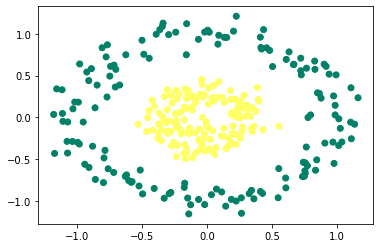

In [ ]:
X, y = make_circles(n_samples=300, noise=0.1, factor=0.3, random_state=0)
X = X.T
y = y.reshape((1, y.shape[0]))

print('dimensions de X', X.shape)
print('dimensions de Y', y.shape)

plt.scatter(X[0,:],X[1,:], c=y, cmap='summer')
plt.show()


100%|██████████| 1000/1000 [00:03<00:00, 253.90it/s]


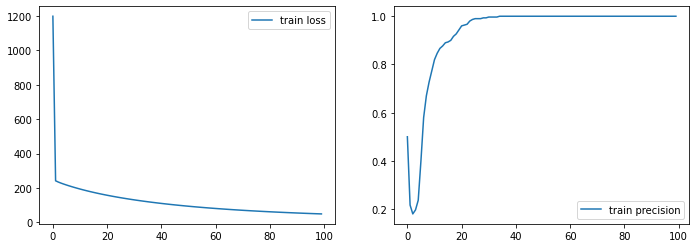

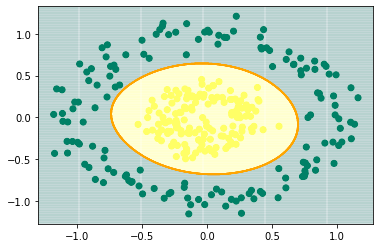

In [ ]:
returns = random_network(X,y, nb_neurone=120,learning_rate=0.1, generation=1000)

plt.figure(figsize=(18,4))
plt.subplot(1,3,1)
plt.plot(returns['loss'], label="train loss")
#plt.plot(t_loss, label="test loss")
plt.legend()

plt.subplot(1,3,2)
plt.plot(returns['accu'], label="train precision")
#plt.plot(t_accu, label="test precision")
plt.legend()

fig, ax = plt.subplots()
plt.scatter(X[0,:],X[1,:], c=y, cmap='summer')

x0_lim = ax.get_xlim()
x1_lim = ax.get_ylim()

reso = 1000

x0 = np.linspace(x0_lim[0], x0_lim[1], reso)
x1 = np.linspace(x1_lim[0], x1_lim[1], reso)

X0, X1 = np.meshgrid(x0,x1)
XX = np.vstack((X0.ravel(),X1.ravel()))

Z = prediction(XX,returns['params'])
Z = Z.reshape((reso,reso))

ax.pcolormesh(X0,X1,Z,cmap='summer',alpha=0.01)
ax.contour(X0,X1,Z,colors='orange')

plt.savefig('overfit.png')
plt.show()